In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.framework import ops
from mlxtend.plotting import plot_decision_regions
ops.reset_default_graph()

input_shape = (n_features,)  
Image processing: input_shape = (28, 28) for example

Rule of Thumb 

| Scenario                    | Shape   | Interpretation                    |
|-----------------------------|---------|-----------------------------------|
| Single data point           | `(3,)`  | Just one vector (no batch)        |
| Single data point (batched) | `(1, 3)`| 1 sample with 3 features          |
| Many data points            | `(N, 3)`| N samples, each with 3 features   |

> The **first dimension** is only considered "samples" when you're working with a **2D array or higher**.


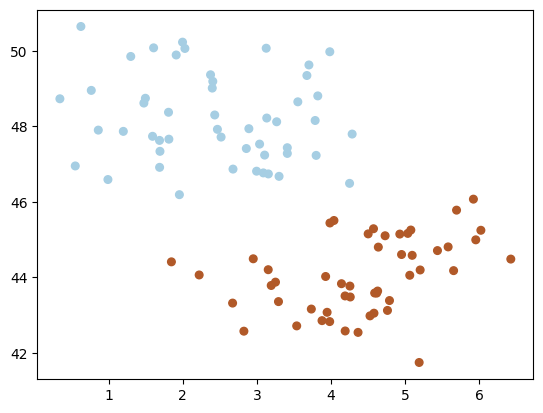

In [21]:
# We randomly generate datapoints from two different gaussians.
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 50))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

In [22]:
# One hot encode
from tensorflow.keras.utils import to_categorical

y_categorical = to_categorical(y, num_classes = 2)

In [23]:
neural_network = tf.keras.Sequential([
    layers.Input(shape = (2, ), name = "Input"),
    layers.Dense(units = 4, name = "Hidden_Layer"),
    layers.Dense(units = 2, activation = "softmax", name = "Output_Layer")
])

In [24]:
neural_network.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer (Dense)            │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22 (88.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
neural_network.compile(
    optimizer = "SGD",
    loss = "categorical_crossentropy",
    metrics = ['accuracy']
)

In [26]:
history = neural_network.fit(X, y_categorical, epochs=100, verbose=0, validation_split = 0.2)

In [27]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.4500,14.468717,0.40,5.843324,0
1,0.3750,20.943432,0.60,9.160006,1
2,0.4250,11.171054,0.40,7.495397,2
3,0.5250,5.188394,0.60,2.413662,3
4,0.5500,2.975875,0.40,5.228827,4
...,...,...,...,...,...
95,0.6125,0.588355,0.50,0.643776,95
96,0.6375,0.596449,0.95,0.371445,96
97,0.8000,0.495005,0.90,0.393532,97
98,0.7625,0.482878,0.95,0.362406,98


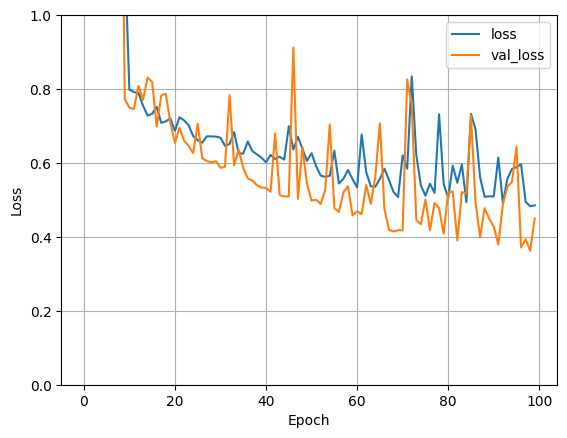

In [28]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [39]:
# Test the model after training
test_results = neural_network.evaluate(X, y_categorical, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7003 - loss: 0.5314 
Test results - Loss: 0.5067588686943054 - Accuracy: 73.00000190734863%


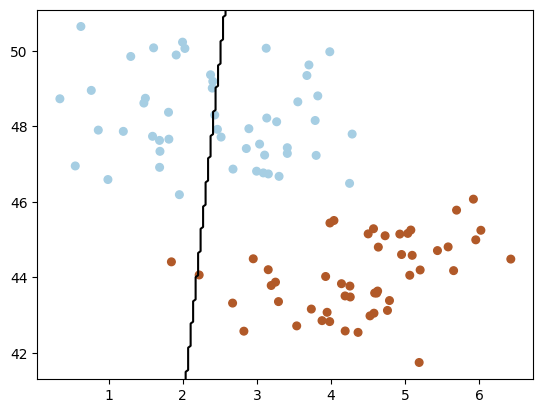

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Plot training data
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Set up mesh grid
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 200)
yy = np.linspace(ylim[0], ylim[1], 200)
YY, XX = np.meshgrid(yy, xx)
grid = np.c_[XX.ravel(), YY.ravel()]

# Predict using the trained neural network
Z_probs = neural_network.predict(grid, verbose=0)
Z = np.argmax(Z_probs, axis=1)
Z = Z.reshape(XX.shape)

# Plot decision boundary
plt.contour(XX, YY, Z, levels=[0.5], colors='k')
plt.show()
